# Analysis of Anna Karenina data

### Import dependencies

In [89]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import gseapy as gp
from matplotlib_venn import venn2
from matplotlib.patches import Patch

import run_ebseq

PALETTE = [
    "#0652ff", #  electric blue
    "#e50000", #  red
    "#9a0eea", #  violet
    "#01b44c", #  shamrock
    "#fedf08", #  dandelion
    "#00ffff", #  cyan
    "#89fe05", #  lime green
    "#a2cffe", #  baby blue
    "#dbb40c", #  gold
    "#029386", #  teal
    "#ff9408", #  tangerine
    "#d8dcd6", #  light grey
    "#80f9ad", #  seafoam
    "#3d1c02", #  chocolate
    "#fffd74", #  butter yellow
    "#536267", #  gunmetal
    "#f6cefc", #  very light purple
    "#650021", #  maroon
    "#020035", #  midnight blue
    "#b0dd16", #  yellowish green
    "#9d7651", #  mocha
    "#c20078", #  magenta
    "#380282", #  indigo
    "#ff796c", #  salmon
    "#874c62"  #  dark muave
]


### Load data

In [2]:
#df = pd.read_csv('Normalized_Matrix_rmDuplicates.tsv', sep='\t', index_col=0)
df = pd.read_csv('log2Top15_GE.csv', sep=',', index_col=0)
df = df.transpose()
df

gene_id,0610012H03RIK,1300002K09RIK,1700012B07RIK,1700023E05RIK,1700024P16RIK,1700026L06RIK,1700065D16RIK,1700084C01RIK,1810009J06RIK,1810011H11RIK,...,ZFP850,ZFP872,ZFYVE28,ZG16,ZIM1,ZMAT4,ZMYND10,ZMYND15,ZPLD1,ZRSR1
T729_T2D,2.139972,0.904790,0.886001,3.321288,3.018142,-0.120079,1.039359,0.115235,8.683662,1.616519,...,-0.574708,6.622929,1.575318,6.028198,0.208431,-0.365326,0.392490,1.013058,3.663532,9.740166
T737_T2H,2.139972,5.183519,2.610027,2.585681,0.535294,2.835978,0.290897,2.265794,1.777734,1.616519,...,4.803432,2.628355,1.575318,17.568044,4.001286,4.892439,7.178433,6.799393,-0.251033,5.267107
Q203_E18.5,2.381888,6.241376,3.686575,3.723977,2.008352,6.217215,0.137820,0.935641,-1.883501,-0.875018,...,5.531309,0.997768,2.613695,5.343438,6.101912,0.178346,5.138722,1.220941,4.036839,7.300163
Q204_P1,3.576088,3.045160,-0.131401,2.102020,2.900100,5.698393,3.061920,1.955748,4.057370,-0.875018,...,4.840375,1.108050,0.935311,3.922136,5.377470,4.556858,3.974061,-0.510507,2.212631,6.845432
T222_T1D,2.669653,6.373886,2.111024,2.901908,2.673608,4.953962,1.822244,2.948087,5.426252,4.518148,...,1.454490,4.961630,5.112352,15.193220,4.033178,0.186980,0.551736,8.059444,0.246294,10.065979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q891_T1ND,0.643385,4.559134,-0.345525,0.894127,-0.307793,3.367261,1.628390,5.003919,4.678436,-0.875018,...,4.002335,5.800783,5.333322,12.797213,5.762778,1.668917,5.887894,1.135550,2.495309,9.737797
Q896_T1ND,3.421890,5.464437,4.510464,3.581188,-0.307793,2.884396,0.137820,6.198411,4.475106,-0.187957,...,1.461347,2.335786,3.090182,13.337554,5.603769,0.178346,4.892857,6.525603,0.004738,9.086007
Q897_T1ND,0.739012,6.296940,0.207986,2.901908,-0.227500,3.953962,0.293749,4.417073,4.151909,2.288835,...,4.534383,2.487966,4.938827,13.777370,4.212360,2.219080,4.357436,6.780621,0.246294,9.876403
Q899_T1ND,-0.553769,5.849013,0.207986,5.172643,2.878513,3.572359,2.744410,5.068305,4.861189,-0.741501,...,4.576862,4.909944,3.410696,15.618562,4.492279,0.702995,5.561587,5.625244,0.246294,10.369488


### Organize the data a little bit to make analyses easier

In [3]:
# Map each sample to its category
sample_to_category = {
    sample: sample.split('_')[1]
    for sample in df.index
}

# Map each category to its samples
category_to_samples = defaultdict(lambda: set())
for sample, cat in sample_to_category.items():
    category_to_samples[cat].add(sample)


# Map each sample to its index
sample_to_index = {
    sample: ind
    for ind, sample in enumerate(df.index)
}

In [4]:
category_to_samples.keys()

dict_keys(['T2D', 'T2H', 'E18.5', 'P1', 'T1D', 'T1ND', 'WT', 'P10', 'P7'])

### Process the data with a few algorithms: PCA and Leiden

In [5]:
import scanpy as sc
from anndata import AnnData

X_log = np.array(df)
ad = AnnData(
    X=X_log,
    obs=pd.DataFrame(
        index=df.index,
        data=[
            sample_to_category[sample]
            for sample in df.index
        ],
        columns=['batch']
    ),
    var=pd.DataFrame(
        data=df.columns,
        index=df.columns
    )
)

sc.pp.pca(ad)
sc.pp.neighbors(ad, n_neighbors=4)
sc.tl.umap(ad)
sc.tl.leiden(ad, resolution=1.5)

#### Here's the PCA plot with samples colored by their category/batch

... storing 'batch' as categorical


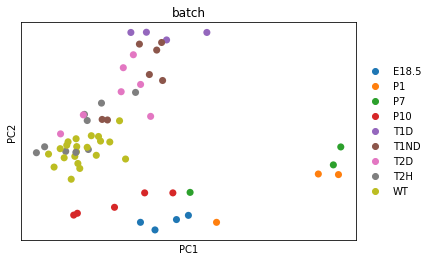

In [6]:
sc.pl.pca(ad, color='batch', s=200)

#### Here's the PCA plot with samples colored by their cluster according to Leiden

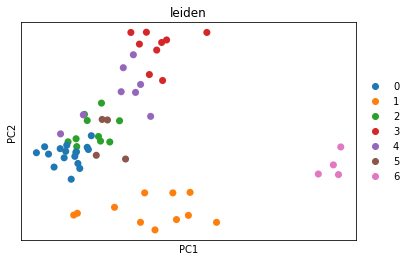

In [7]:
sc.pl.pca(ad, color='leiden', s=200)

## Create Heatmap

In [115]:
BETA_CELL_MATURATION_GENES = [
    'MAFA',
    'NKX6-1',
    'PDX1',
    'NEUROD1',
    'FOXA2',
    'RFX6',
    'TSHZ1',
    'NKX2-2',
    'ISL1',
    'INSM1',
    'PAX6',
    'GLIS3',
    'FOXO1',
    'SLC2A2',
    'UCN3'
]

IMMATURE_BETA_CELL_GENES = [
    'MAFB',
    'DLK1',
    'NNAT',
    'GAST',
    'PCK1',
    'NEUROG3',
    'SOX9',
    'SOX17',
    'FEV',
    'MYC'
]

BETA_CELL_DISALLOWED = [
    'LDHA',
    'HK1',
    'MYLK',
    'PARP3',
    'IGFBP4',
    'NDRG2',
    'PCOLCE',
    'SLC16A2',
    'LY6A',
    'ALDH1A3'
]

ISLET_HORMONES = [
    'INS1',
    'INS2',
    'GCG',
    'SST',
    'PPY'
]

In [116]:
#df_plot = df[BETA_CELL_MATURATION_GENES+IMMATURE_BETA_CELL_GENES+BETA_CELL_DISALLOWED+ISLET_HORMONES]
#df_plot = df[BETA_CELL_MATURATION_GENES]




In [117]:
df_counts = pd.read_csv('Raw_Matrix_filter_rmDup.tsv', sep='\t')
df_counts = df_counts.set_index('GENE_ID')
df_counts

,T729_T2D,T737_T2H,Q203_E18.5,Q204_P1,T222_T1D,Q225_T1ND,Q279_T2D_XXX,T286.1_T2H,Q287_WT,Q292_WT,...,Q792_WT,Q819_WT,T843_WT,T880_WT,Q890_WT,Q891_T1ND,Q896_T1ND,Q897_T1ND,Q899_T1ND,Q918_T2H
GENE_ID,,,,,,,,,,,,,,,,,,,,,
0610007P14RIK,1233.00,1212.00,1039.97,1179.96,586.07,465.44,404.90,497.26,590.16,490.99,...,369.03,655.94,752.62,632.23,532.46,717.28,543.89,579.59,378.01,439.85
0610009B22RIK,6048.40,3608.59,3554.90,3224.48,1475.05,1309.53,1348.77,1427.68,1299.68,1846.15,...,1525.98,1570.52,1973.26,1772.51,1641.50,1856.05,1863.37,1309.23,1120.49,1493.43
0610009D07RIK,2608.15,3372.00,6266.52,6086.78,1928.94,1871.15,1517.46,2254.95,2485.87,2210.91,...,2500.21,2293.26,2848.21,2637.55,2210.99,2329.88,1450.88,1841.17,1764.46,2228.42
0610009O20RIK,292.00,480.98,335.45,424.02,200.61,143.00,264.09,209.32,304.65,165.48,...,253.14,284.00,229.58,233.00,209.03,437.00,105.03,225.07,168.41,202.00
0610010F05RIK,1365.00,1127.70,808.69,1056.00,744.33,597.00,1344.31,677.08,1256.51,577.00,...,655.97,628.09,1052.94,1439.23,715.39,722.00,461.00,1456.85,520.59,532.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,163.03,281.00,523.00,1686.00,609.00,124.99,229.72,5.07,98.00,50.00,...,91.00,139.00,72.00,112.00,107.00,186.00,268.97,476.01,271.03,143.00
ZZEF1,871.00,1386.00,1087.45,899.73,1070.20,739.58,794.05,526.45,814.36,966.48,...,1032.92,999.06,1093.02,762.83,873.41,1125.93,473.00,667.70,767.61,783.58
ZZZ3,1231.03,1294.00,759.35,1311.79,660.59,623.00,2413.77,753.55,1764.66,902.24,...,1013.43,1134.73,1656.51,1441.79,1052.67,960.32,476.00,1417.36,684.39,484.00


In [118]:
X_log_cpm = np.array([
    x / sum(x)
    for x in np.array(df_counts).T
])
X_log_cpm *= 1e6
X_log_cpm = np.log2(X_log_cpm+1)

df_log2cpm = pd.DataFrame(
    data=X_log_cpm,
    index=df_counts.columns,
    columns=df_counts.index
)
df_log2cpm = df_log2cpm.transpose()
df_log2cpm

,T729_T2D,T737_T2H,Q203_E18.5,Q204_P1,T222_T1D,Q225_T1ND,Q279_T2D_XXX,T286.1_T2H,Q287_WT,Q292_WT,...,Q792_WT,Q819_WT,T843_WT,T880_WT,Q890_WT,Q891_T1ND,Q896_T1ND,Q897_T1ND,Q899_T1ND,Q918_T2H
GENE_ID,,,,,,,,,,,,,,,,,,,,,
0610007P14RIK,4.145550,4.285289,4.637141,4.812057,4.017275,3.963639,3.636546,3.995629,4.117427,3.856451,...,3.404724,4.166163,4.491077,3.927157,4.060541,4.263105,3.895879,4.006407,3.589109,3.703896
0610009B22RIK,6.373527,5.809339,6.368798,6.229449,5.294173,5.395151,5.289001,5.457050,5.210300,5.692175,...,5.345487,5.378198,5.841423,5.352091,5.625179,5.587880,5.602093,5.131104,5.075034,5.387145
0610009D07RIK,5.182771,5.713312,7.179079,7.136991,5.672540,5.899700,5.454907,6.104373,6.127178,5.947685,...,6.043907,5.913382,6.363148,5.913864,6.047308,5.909787,5.249526,5.611065,5.714426,5.953121
0610009O20RIK,2.308750,3.060235,3.121667,3.424294,2.632368,2.455806,3.080571,2.866676,3.239341,2.471128,...,2.921976,3.060071,2.917373,2.641018,2.839517,3.595605,1.880294,2.776641,2.564641,2.706042
0610010F05RIK,4.284373,4.186803,4.290744,4.657945,4.343075,4.302252,5.284345,4.416733,5.162904,4.074405,...,4.173763,4.107130,4.957092,5.059750,4.464318,4.272076,3.674653,5.281061,4.017620,3.959995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,1.681631,2.402950,3.701682,5.311426,4.069285,2.299006,2.904711,0.204697,1.893809,1.246839,...,1.750602,2.199290,1.611483,1.814633,2.053844,2.515949,2.975817,3.741769,3.155696,2.296154
ZZEF1,3.677609,4.469508,4.699015,4.436791,4.845132,4.597060,4.550209,4.072901,4.558920,4.783643,...,4.799318,4.745305,5.009284,4.181740,4.740374,4.886082,3.708857,4.198680,4.548893,4.487564
ZZZ3,4.143373,4.375041,4.204704,4.959685,4.179871,4.360698,6.112271,4.564239,5.641229,4.688139,...,4.772833,4.922565,5.593792,5.062237,5.000476,4.664941,3.717283,5.242448,4.390813,3.831757


In [119]:
df_log2cpm_plot = df_log2cpm.loc[BETA_CELL_MATURATION_GENES+IMMATURE_BETA_CELL_GENES+BETA_CELL_DISALLOWED+ISLET_HORMONES]
df_log2cpm_plot

,T729_T2D,T737_T2H,Q203_E18.5,Q204_P1,T222_T1D,Q225_T1ND,Q279_T2D_XXX,T286.1_T2H,Q287_WT,Q292_WT,...,Q792_WT,Q819_WT,T843_WT,T880_WT,Q890_WT,Q891_T1ND,Q896_T1ND,Q897_T1ND,Q899_T1ND,Q918_T2H
GENE_ID,,,,,,,,,,,,,,,,,,,,,
MAFA,2.988045,6.794269,5.874795,6.579943,6.086208,7.320277,5.977740,7.211994,7.054013,5.545523,...,6.150435,6.254075,7.976992,7.524217,7.392645,7.118478,3.529099,6.811997,5.602032,4.470470
NKX6-1,5.508564,6.941716,7.624435,7.712019,6.718787,7.327669,6.169191,7.521563,6.989815,7.268685,...,7.458613,7.646612,7.772522,7.458027,7.385975,7.875738,6.347962,7.186674,7.640189,6.903503
PDX1,6.383007,6.874074,7.914154,7.955617,6.006328,6.723848,6.285373,6.702552,7.343633,6.633355,...,6.527837,7.086850,7.153870,6.671351,6.939856,7.077561,5.322401,6.758782,6.277819,6.046052
NEUROD1,6.208094,6.915297,8.161022,7.933961,7.446691,7.365433,6.824741,7.089194,7.443226,6.933362,...,6.993156,7.288097,8.001599,7.370443,7.284699,7.332009,6.208527,7.531843,7.203314,6.510137
FOXA2,5.357838,4.866664,6.011288,5.972811,5.137017,5.668766,5.463124,5.315503,6.264029,5.499670,...,5.539451,5.426318,5.556661,5.183289,5.319923,5.725684,4.780674,5.334057,5.261606,4.993420
RFX6,5.971299,4.686369,5.112399,5.427189,5.040886,5.233990,6.904389,4.993386,5.591842,4.393785,...,4.621623,4.530483,5.459125,5.244889,5.123713,4.743121,3.639559,5.606822,4.081301,4.133727
TSHZ1,4.608282,5.848199,5.960433,6.696759,4.654682,5.985715,2.886476,5.675595,5.698151,6.297047,...,5.780944,6.823987,6.764957,5.974858,5.766111,6.427672,5.401128,5.327457,5.886353,5.667808
NKX2-2,4.794528,5.744820,6.492122,6.839080,5.232820,5.716966,5.904410,5.948126,5.727321,5.153679,...,4.969465,5.243258,6.535994,5.600963,5.775056,5.808706,4.385589,5.463994,4.950456,4.767275
ISL1,6.889671,6.594494,7.546548,6.864298,5.634974,6.776729,5.251196,5.913598,7.024553,6.791182,...,6.190424,6.907029,6.928561,6.530227,6.468587,6.985378,6.412004,6.412439,6.238340,5.845379


### Get column order by performing clustering within each category of samples (e.g. T2D) and then concatenating all of the samples together post-clustering

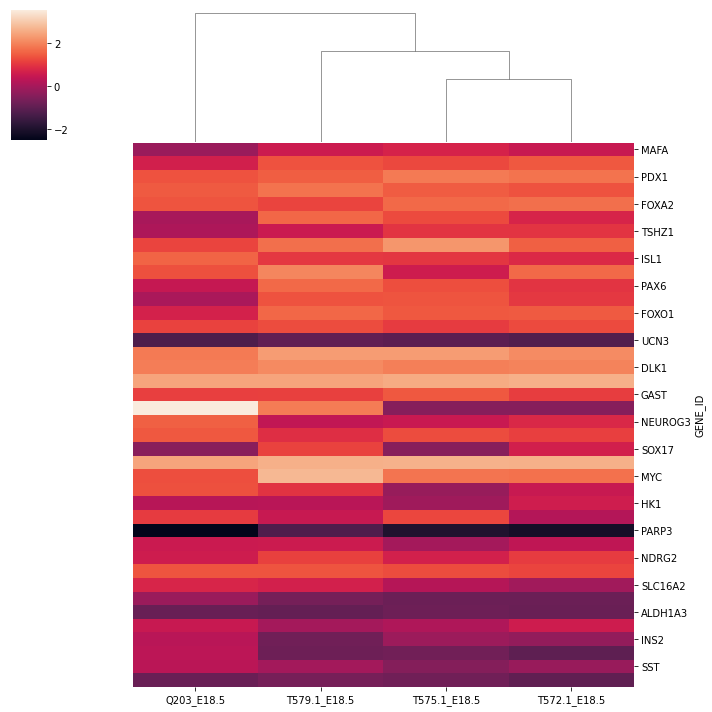

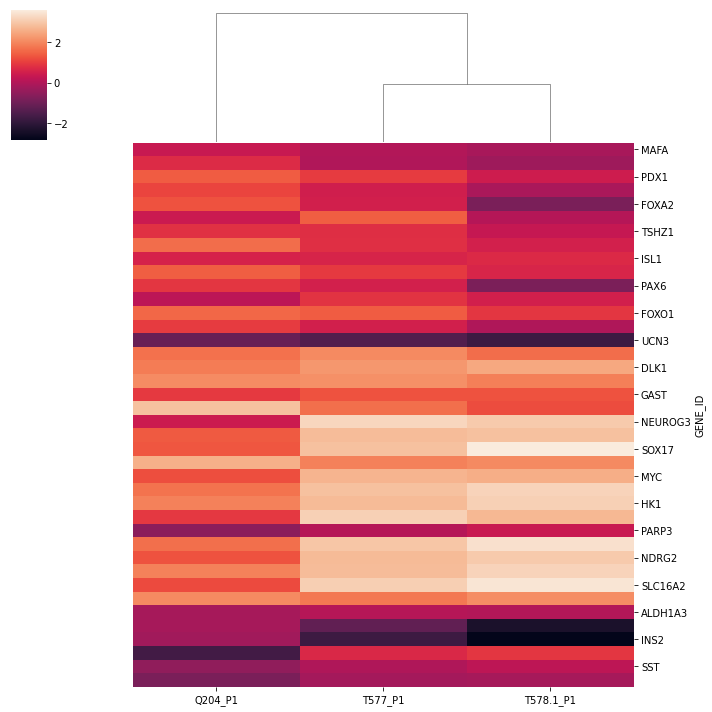

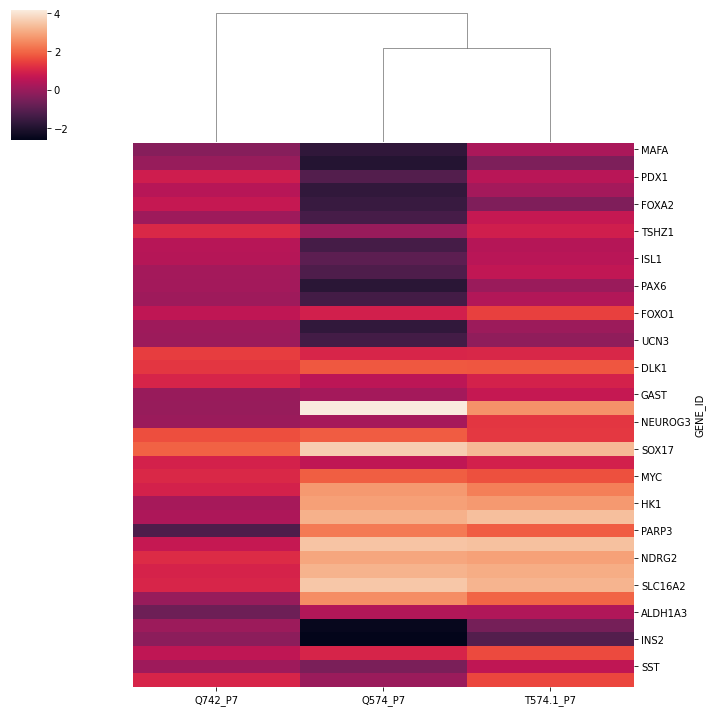

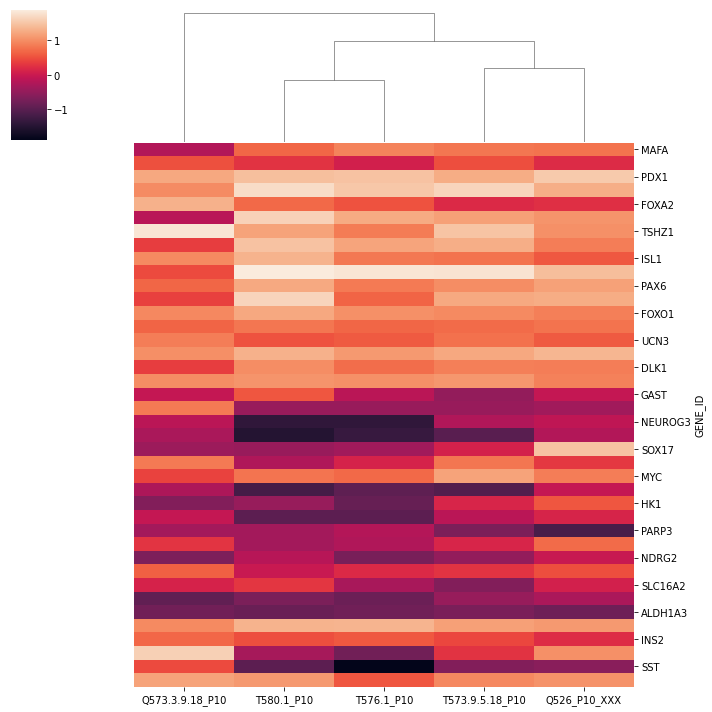

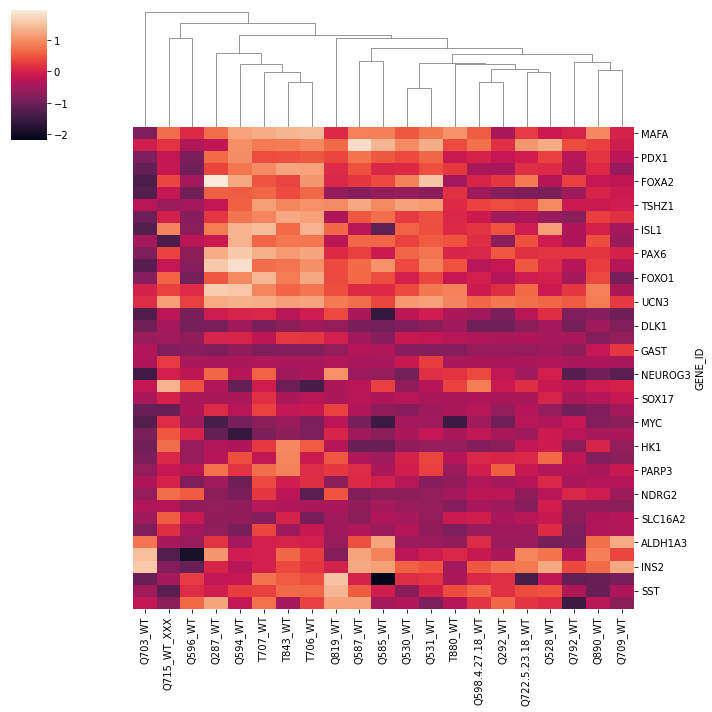

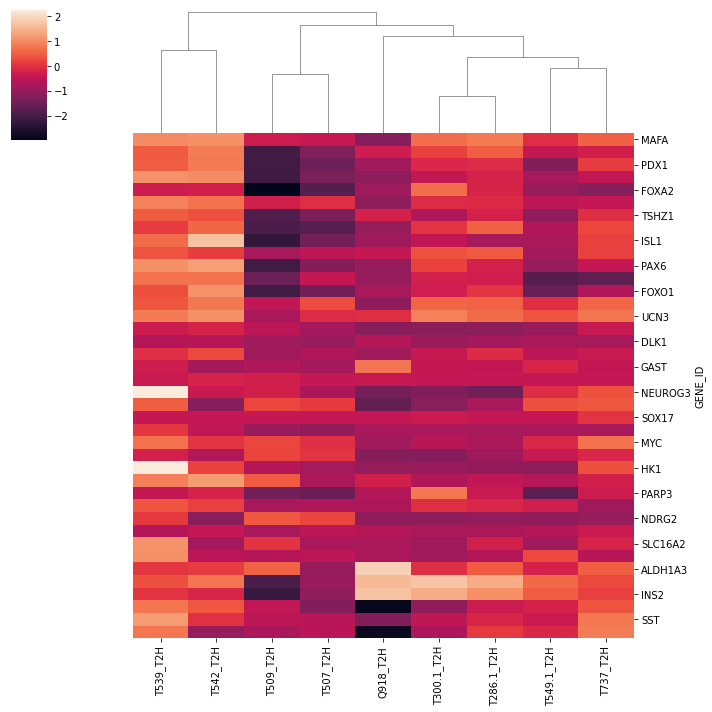

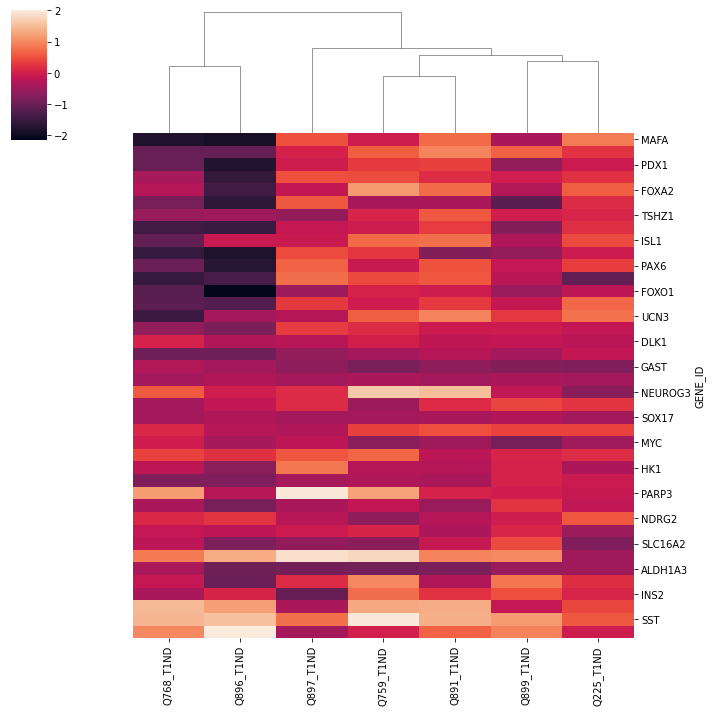

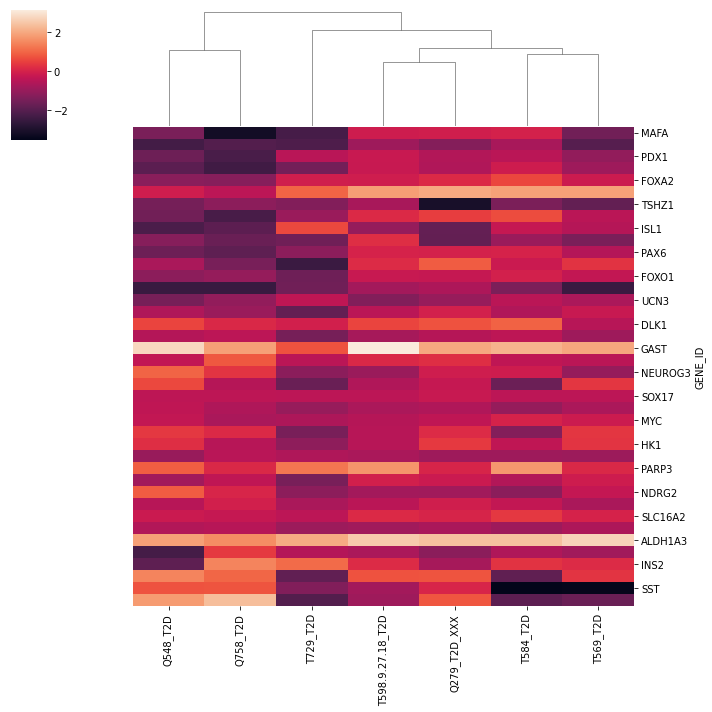

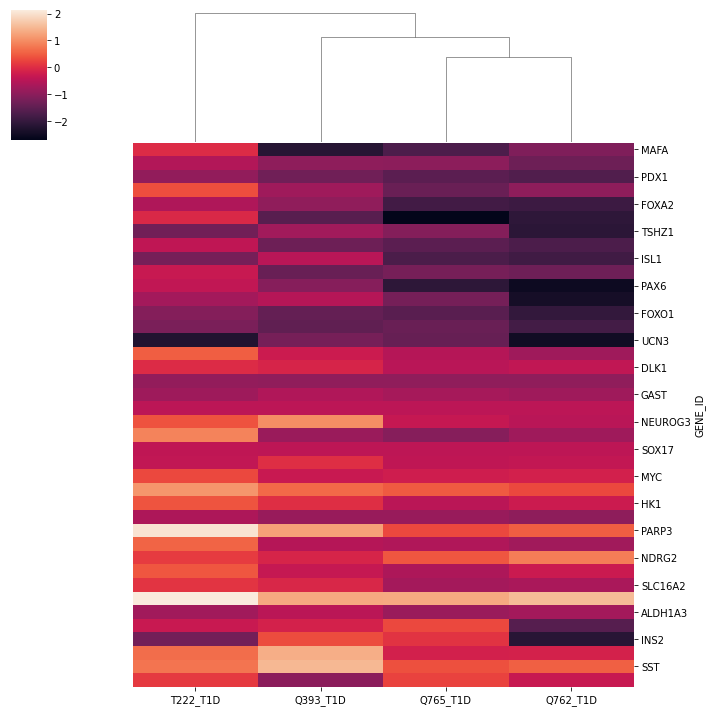

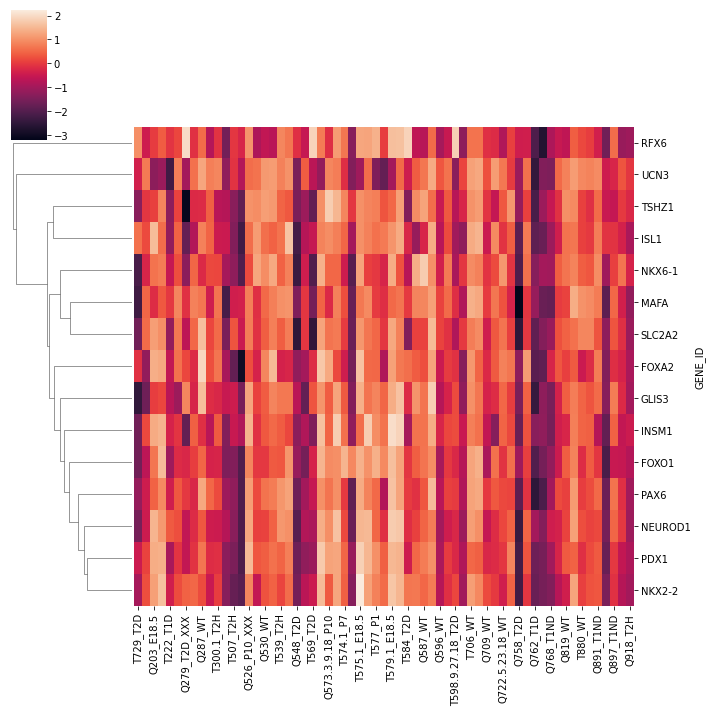

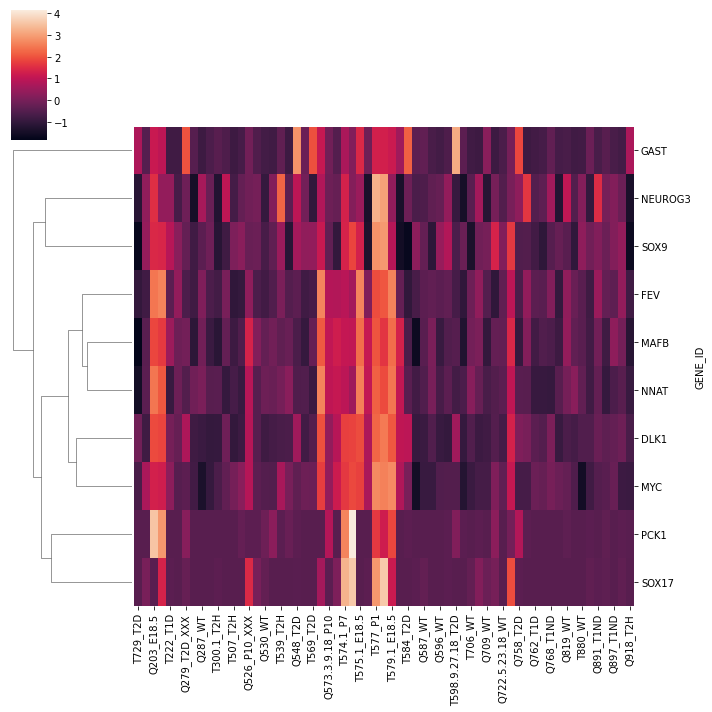

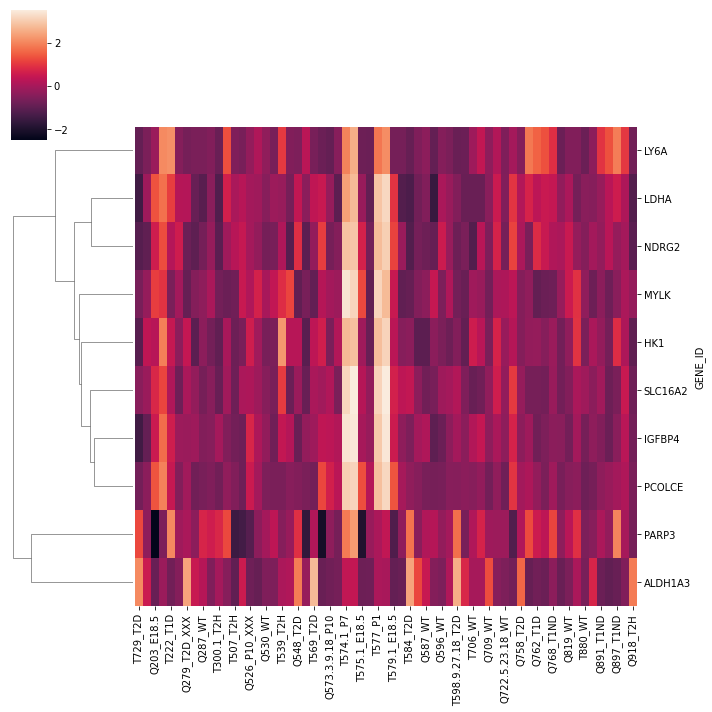

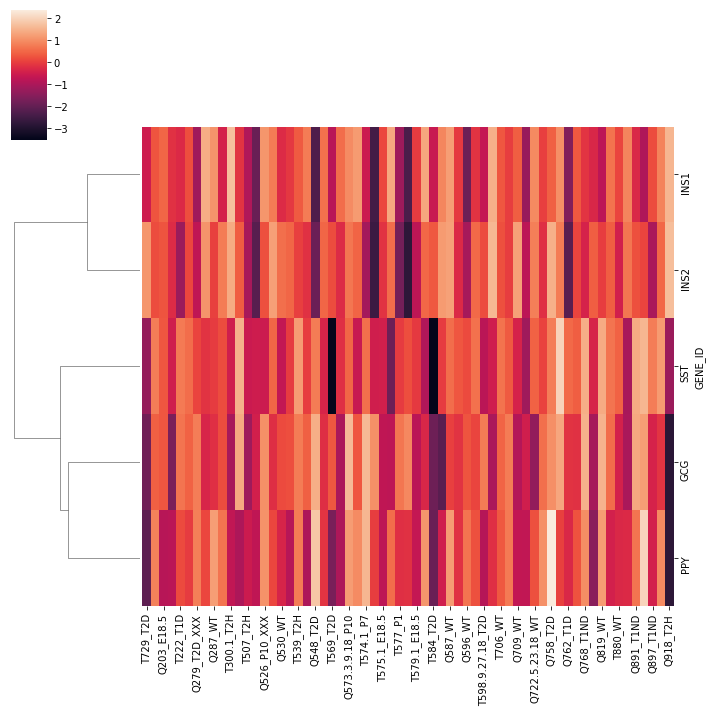

In [238]:
from scipy.stats import zscore
import seaborn as sns

X_zscore = zscore(np.array(df_log2cpm_plot), axis=1)
df_zscore = pd.DataFrame(
    data=X_zscore,
    index=df_log2cpm_plot.index,
    columns=df_log2cpm_plot.columns
)

gene_group_to_genes = {
    'Mature beta cell': BETA_CELL_MATURATION_GENES,
    'Immature beta cell': IMMATURE_BETA_CELL_GENES,
    'Beta cell disallowed': BETA_CELL_DISALLOWED,
    'Islet hormones': ISLET_HORMONES
}

CATEGORIES_ORDER = ['E18.5', 'P1', 'P7', 'P10', 'WT', 'T2H', 'T1ND', 'T2D', 'T1D']
GENE_GROUP_ORDER = ['Mature beta cell', 'Immature beta cell', 'Beta cell disallowed', 'Islet hormones']

ordered_samples = []
new_X = []
for cat in CATEGORIES_ORDER:
    cat_df = df_zscore[category_to_samples[cat]]
    cg = sns.clustermap(cat_df, row_cluster=False, col_cluster=True)
    inds = cg.dendrogram_col.reordered_ind
    ordered_samples += list(np.array(cat_df.columns)[inds])
    
ordered_genes = []
for gg in GENE_GROUP_ORDER:
    gg_df = df_zscore.loc[gene_group_to_genes[gg]]
    cg = sns.clustermap(gg_df, row_cluster=True, col_cluster=False)
    inds = cg.dendrogram_row.reordered_ind
    ordered_genes += list(np.array(gg_df.index)[inds])

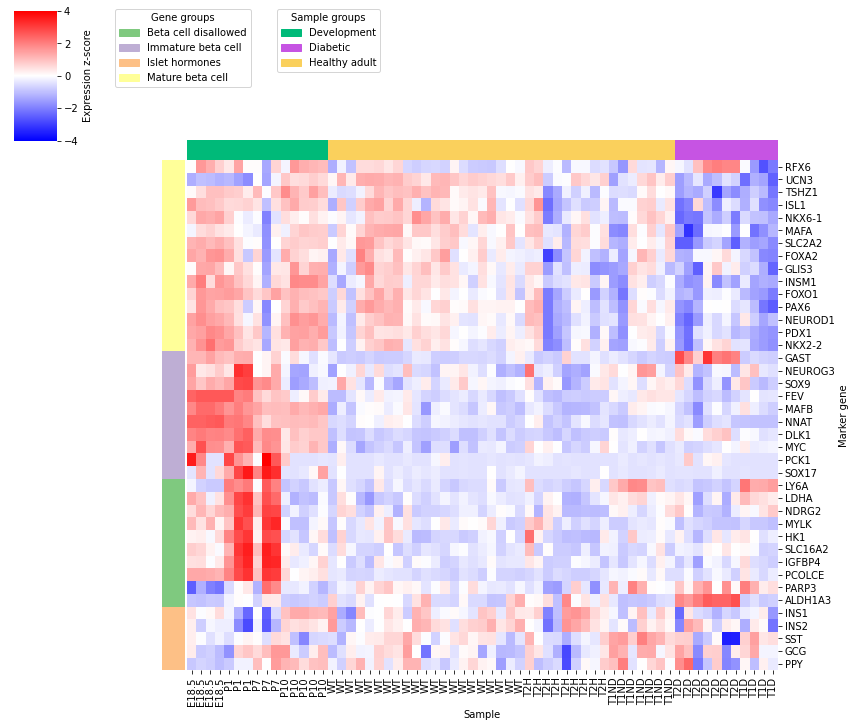

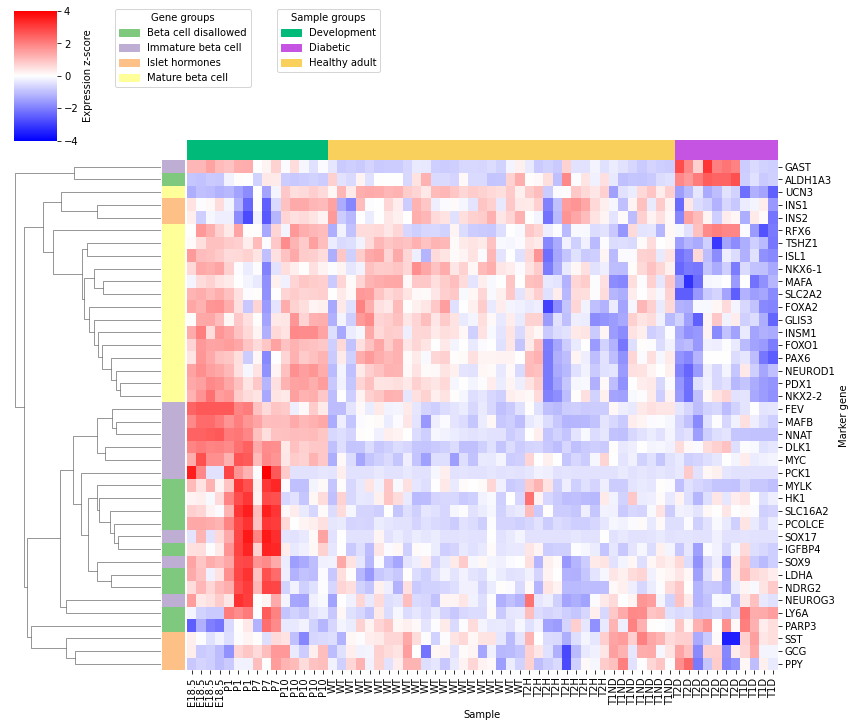

In [239]:
PALETTE_2 = [
    '#00ba79',
    #'#417be8',
    '#c654e3',
    '#fad05c'
]

# Get all of the column categories
categories = []
for cat in CATEGORIES_ORDER:
    categories += list(np.full(len(category_to_samples[cat]), cat)) 

# Get all of the column labels
category_to_label = {
    'WT': 'Healthy adult',
    'T2H': 'Healthy adult',
    'T1ND': 'Healthy adult',
    'T2D': 'Diabetic',
    'T1D': 'Diabetic',
    'E18.5': 'Development',
    'P1': 'Development',
    'P7': 'Development',
    'P10': 'Development'
}   
labels = []
for cat in CATEGORIES_ORDER:
    labels += list(np.full(len(category_to_samples[cat]), category_to_label[cat]))
    

    
# Get the row gene groups
gene_group = []
for gg in GENE_GROUP_ORDER:
    gene_group += list(np.full(len(gene_group_to_genes[gg]), gg))


#gene_group = list(np.full(len(BETA_CELL_MATURATION_GENES), 'Mature beta cell')) \
#    +  list(np.full(len(IMMATURE_BETA_CELL_GENES), 'Immature beta cell')) \
#    +  list(np.full(len(BETA_CELL_DISALLOWED), 'Beta cell disallowed')) \
#    +  list(np.full(len(ISLET_HORMONES), 'Islet hormones'))


# Map the rows to their colors
gene_group_to_color = {
    gg: sns.color_palette("Accent")[g_i] 
    for g_i, gg in enumerate(sorted(set(gene_group)))
}
row_colors = [gene_group_to_color[cat] for cat in gene_group]

# Map the columns to their colors
cat_to_color = {
    cat: PALETTE_2[cat_i] #sns.color_palette("Accent")[cat_i] 
    for cat_i, cat in enumerate(sorted(set(labels)))
}
col_colors = [cat_to_color[cat] for cat in labels]


# Re-order the columns and rename them
df_zscore = df_zscore[ordered_samples]
df_zscore = df_zscore.loc[ordered_genes]
df_zscore = df_zscore.rename(
    sample_to_category,
    axis='columns'
)

# Create the plot
cg = sns.clustermap(
    df_zscore, 
    cmap='bwr',
    col_cluster=False,
    row_cluster=False,
    col_colors=col_colors,
    row_colors=row_colors,
    xticklabels=1,
    yticklabels=1,
    figsize=(12,10),
    vmin=-4,
    vmax=4
)
cg.ax_heatmap.set_ylabel('Marker gene')
cg.ax_heatmap.set_xlabel('Sample')
cg.ax_cbar.set_ylabel('Expression z-score')

gene_patches = [
    mpatches.Patch(color=sns.color_palette("Accent")[g_i], label=gg)
    for g_i, gg in enumerate(sorted(set(gene_group)))
]
first_legend = plt.legend(handles=gene_patches, title='Gene groups', bbox_to_anchor=(0.3, 0.99), bbox_transform=plt.gcf().transFigure, loc='upper right')

ax = plt.gca().add_artist(first_legend)
sample_patches = [
    mpatches.Patch(color=PALETTE_2[cat_i], label=cat)
    for cat_i, cat in enumerate(sorted(set(labels)))
]
plt.legend(handles=sample_patches, title='Sample groups', bbox_to_anchor=(0.45, 0.99), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.show()

# Save figure
cg.savefig('results/marker_gene_heatmap.tiff', format='tiff', dpi=150)
cg.savefig('results/marker_gene_heatmap.pdf', format='pdf')

cg = sns.clustermap(
    df_zscore, 
    cmap='bwr',
    col_cluster=False,
    row_cluster=True,
    col_colors=col_colors,
    row_colors=row_colors,
    xticklabels=1,
    yticklabels=1,
    figsize=(12,10),
    vmin=-4,
    vmax=4
)
cg.ax_heatmap.set_ylabel('Marker gene')
cg.ax_heatmap.set_xlabel('Sample')
cg.ax_cbar.set_ylabel('Expression z-score')

gene_patches = [
    mpatches.Patch(color=sns.color_palette("Accent")[g_i], label=gg)
    for g_i, gg in enumerate(sorted(set(gene_group)))
]
first_legend = plt.legend(handles=gene_patches, title='Gene groups', bbox_to_anchor=(0.3, 0.99), bbox_transform=plt.gcf().transFigure, loc='upper right')

ax = plt.gca().add_artist(first_legend)
sample_patches = [
    mpatches.Patch(color=PALETTE_2[cat_i], label=cat)
    for cat_i, cat in enumerate(sorted(set(labels)))
]
plt.legend(handles=sample_patches, title='Sample groups', bbox_to_anchor=(0.45, 0.99), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.show()

# Save figure
cg.savefig('results/marker_gene_heatmap.clust_genes.tiff', format='tiff', dpi=150)
cg.savefig('results/marker_gene_heatmap.clust_genes.pdf', format='pdf')

In [ ]:
### Build plot components to assemble in Adobe Illustrator

In [ ]:
from scipy.stats import zscore
import seaborn as sns

X_zscore = zscore(np.array(df_log2cpm_plot), axis=1)
df_zscore = pd.DataFrame(
    data=X_zscore,
    index=df_log2cpm_plot.index,
    columns=df_log2cpm_plot.columns
)

gene_group_to_genes = {
    'Mature beta cell': BETA_CELL_MATURATION_GENES,
    'Immature beta cell': IMMATURE_BETA_CELL_GENES,
    'Beta cell disallowed': BETA_CELL_DISALLOWED,
    'Islet hormones': ISLET_HORMONES
}

CATEGORIES_ORDER = ['E18.5', 'P1', 'P7', 'P10', 'WT', 'T2H', 'T1ND', 'T2D', 'T1D']
GENE_GROUP_ORDER = ['Mature beta cell', 'Immature beta cell', 'Beta cell disallowed', 'Islet hormones']

ordered_samples = []
new_X = []
for cat in CATEGORIES_ORDER:
    cat_df = df_zscore[category_to_samples[cat]]
    cg = sns.clustermap(cat_df, row_cluster=False, col_cluster=True)
    inds = cg.dendrogram_col.reordered_ind
    ordered_samples += list(np.array(cat_df.columns)[inds])

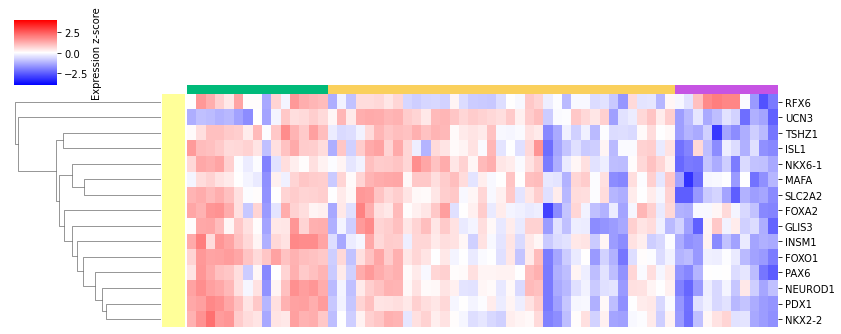

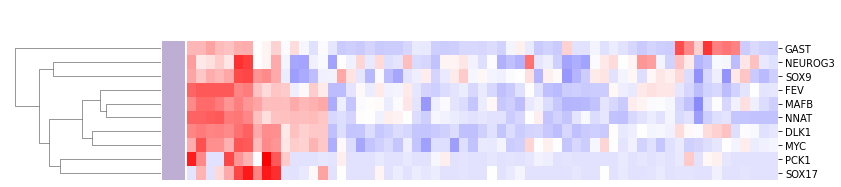

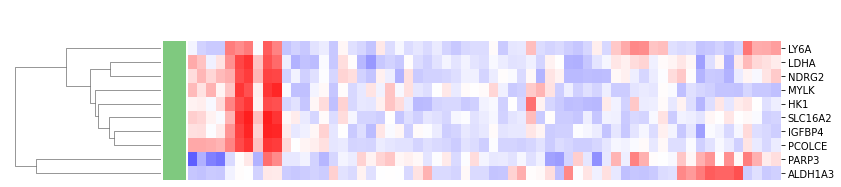

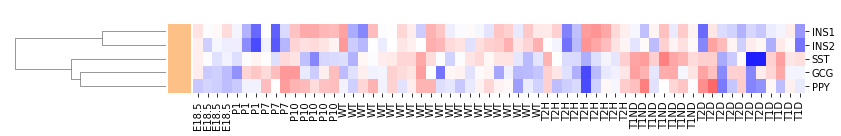

In [216]:
ordered_genes = []

gene_group_to_color = {
    gg: sns.color_palette("Accent")[g_i] 
    for g_i, gg in enumerate(sorted(set(GENE_GROUP_ORDER)))
}

cat_to_color = {
    cat: PALETTE_2[cat_i] #sns.color_palette("Accent")[cat_i] 
    for cat_i, cat in enumerate(sorted(set(labels)))
}
col_colors = [cat_to_color[cat] for cat in labels]


for gg_i, gg in enumerate(GENE_GROUP_ORDER):
    if gg_i == 0:
        figsize=(12, 5.0)
    elif gg_i == 1:
        figsize=(12, 3.2)
    elif gg_i == 2:
        figsize=(12, 3.2)
    elif gg_i == 3:
        figsize=(12, 2.)
    
    
    if gg_i > 0:
        col_colors = None


    gg_df = df_zscore.loc[gene_group_to_genes[gg]]
    
    row_colors = [gene_group_to_color[gg] for x in range(gg_df.shape[0])]
    
    #gg_df = gg_df[ordered_samples]
    cg = sns.clustermap(
        gg_df, 
        row_cluster=True, 
        col_cluster=False, 
        cmap='bwr', 
        vmin=-4, 
        vmax=4, 
        figsize=figsize, 
        xticklabels=1,
        yticklabels=1,
        row_colors=row_colors,
        col_colors=col_colors
    )
    inds = cg.dendrogram_row.reordered_ind
    ordered_genes += list(np.array(gg_df.index)[inds])
      
    if gg_i == 0:
        cg.ax_heatmap.set_xticks([])
        cg.ax_cbar.set_ylabel('Expression z-score')
    elif gg_i == 3:
        cg.cax.set_visible(False)
        #cg.ax_heatmap.set_xlabel('Sample')
    else:
        cg.ax_heatmap.set_xticks([])
        cg.cax.set_visible(False)
    cg.ax_heatmap.set_ylabel('')
    
    #plt.tight_layout()
    plt.show()
    
    cg.savefig(f'results/marker_gene_heatmap.clust_genes.group_{gg_i}.pdf', format='pdf')


/opt/anaconda3/envs/r-4.0/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bb_box" which is no longer supported as of 3.3 and will become an error two minor releases later


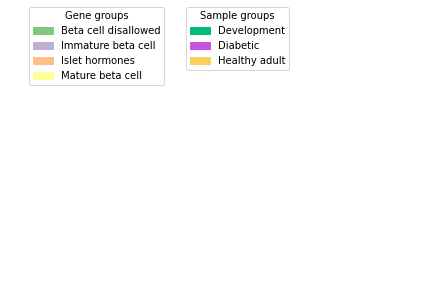

In [237]:
gene_patches = [
    mpatches.Patch(color=sns.color_palette("Accent")[g_i], label=gg)
    for g_i, gg in enumerate(sorted(set(gene_group)))
]
first_legend = plt.legend(
    handles=gene_patches, 
    title='Gene groups', 
    bbox_to_anchor=(0.4, 1.), 
    bbox_transform=plt.gcf().transFigure, 
    loc='upper right'
)

ax = plt.gca().add_artist(first_legend)
sample_patches = [
    mpatches.Patch(color=PALETTE_2[cat_i], label=cat)
    for cat_i, cat in enumerate(sorted(set(labels)))
]
plt.legend(
    handles=sample_patches, 
    title='Sample groups', 
    bbox_to_anchor=(0.69, 1.), 
    bbox_transform=plt.gcf().transFigure, loc='upper right'
)
#ax.set_visible(False)
cg.ax_heatmap.set_xticks([])

plt.tight_layout()
plt.xticks([])
plt.yticks([])
plt.axis("off")


plt.tight_layout()
plt.savefig(f'results/legend.pdf', bb_box='tight', format='pdf')